In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
dataset=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

In [94]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [95]:
X=dataset[[0,1,2,3,4,5,6,7]].values
y=dataset[8].values

In [120]:
class LogisticRegression:
    def __init__(self,lr=0.01,l2_lambda=0.01,epochs=1500,batch_size=None):
        self.lr=lr
        self.l2_lambda=l2_lambda
        self.epochs=epochs
        self.batch_size=batch_size
        self.weight=None
        self.bias=None
        self.loss_history=[]
    def predict(self,X):
        z=np.dot(X,self.weight) + self.bias
        return z
    def fit(self,X,y):
        no_features=len(X)
        X=(X-X.mean())/X.std()
        np.random.seed(42)
        self.weight=np.random.randn(X.shape[-1])
        self.bias=np.random.randn()
        # self.loss_history=[]

        for _ in range(self.epochs):
            y_linear=self.bias + np.dot(X,self.weight)
            self.y_predicted=self._sigmoid(y_linear)
            error= self.y_predicted - y
            
            
            
            weight_gradient=(1/no_features)*np.dot(X.T,error)
            bias_gradient =(1/no_features)*np.sum(error)
            
            weight_gradient +=2*self.l2_lambda*self.weight
            
            self.weight-= weight_gradient*self.lr
            self.bias -=bias_gradient*self.lr
            
            loss= - np.mean(y*np.log(self.y_predicted)+(1-y)*np.log(1-self.y_predicted))
            l2_penalty=self.l2_lambda* np.sum(self.weight**2)

            loss=loss+l2_penalty

            self.loss_history.append(loss)
        



    def _sigmoid(self,y_linear):
        y_predi=1/(1+(np.exp(-y_linear)))
        return y_predi
                   

In [121]:
model= LogisticRegression()

In [122]:
model.fit(X,y)

In [123]:
z=model.predict(X)
model._sigmoid(z)

array([0.57608734, 0.25798576, 0.50524485, 0.22502162, 0.42147435,
       0.2697294 , 0.21619979, 0.18572245, 0.75188995, 0.40310977,
       0.27162212, 0.46968805, 0.44318905, 0.63879221, 0.57341358,
       0.15704549, 0.45062617, 0.24751214, 0.2950844 , 0.36296459,
       0.45714226, 0.28129481, 0.6165222 , 0.41958867, 0.58490766,
       0.42060425, 0.41400822, 0.22562036, 0.5415415 , 0.31606254,
       0.42303535, 0.54437573, 0.18770621, 0.22046545, 0.46164113,
       0.32397241, 0.36580719, 0.40858556, 0.31007447, 0.49169044,
       0.56358083, 0.36006442, 0.37587147, 0.67616879, 0.43348845,
       0.62429535, 0.335544  , 0.20149329, 0.33111721, 0.15675108,
       0.24926826, 0.23035095, 0.24357163, 0.70719513, 0.56399323,
       0.14481678, 0.68438833, 0.44913898, 0.4191312 , 0.32737862,
       0.1119321 , 0.34852468, 0.10913096, 0.43498943, 0.28368763,
       0.31192121, 0.39025497, 0.32797467, 0.22423664, 0.47894104,
       0.26571581, 0.44891565, 0.36534732, 0.3684031 , 0.23419

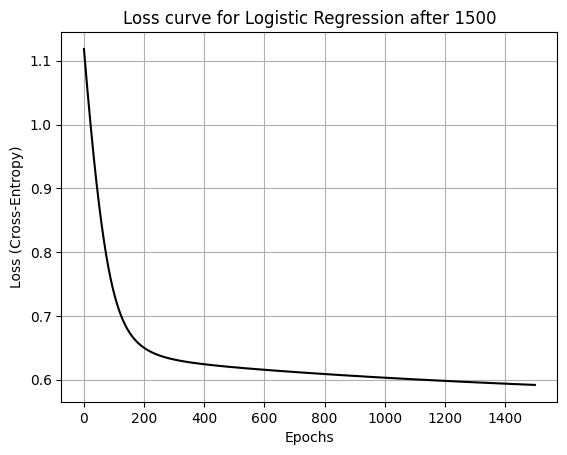

In [124]:
plt.plot(model.loss_history,color='black')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs}")
plt.grid(True)
